## 230968336
## SAMEER RAJ
## week-9

## Q1.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# 1. Load and preprocess data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

# 2. Define the convolutional autoencoder architecture

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)  # 16x16x32
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)  # 8x8x64
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)  # 4x4x128

# Decoder
x = Conv2D(128, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)  # 8x8x128
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)  # 16x16x64
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)  # 32x32x32
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)  # output shape: 32x32x3

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

autoencoder.summary()

# 3. Train the autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# 4. Evaluate and visualize

# Predict reconstructed images
decoded_imgs = autoencoder.predict(x_test)

Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                             

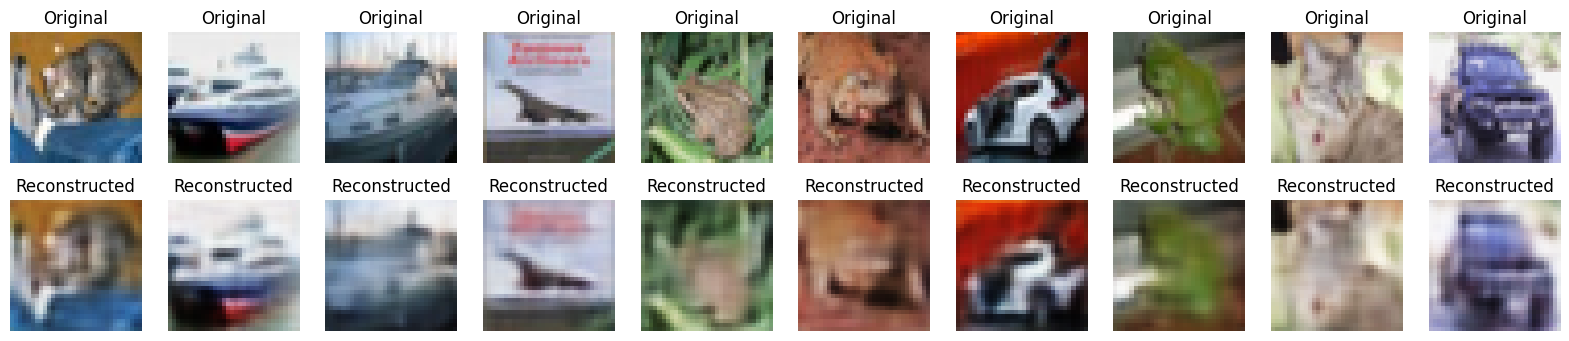

In [9]:

def plot_reconstructions(original, reconstructed, n=10):
    plt.figure(figsize=(20,4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i+1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

plot_reconstructions(x_test, decoded_imgs)


## Q2.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Step 1: Load and preprocess data
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Step 2: Add noise
noise_factor = 0.2

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip to keep pixel values between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Step 3: Define convolutional autoencoder architecture

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# Decoder
x = Conv2D(128, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

autoencoder.summary()

# Step 4: Train the autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 128)         7385

313/313 [==============================] - 0s 1ms/step


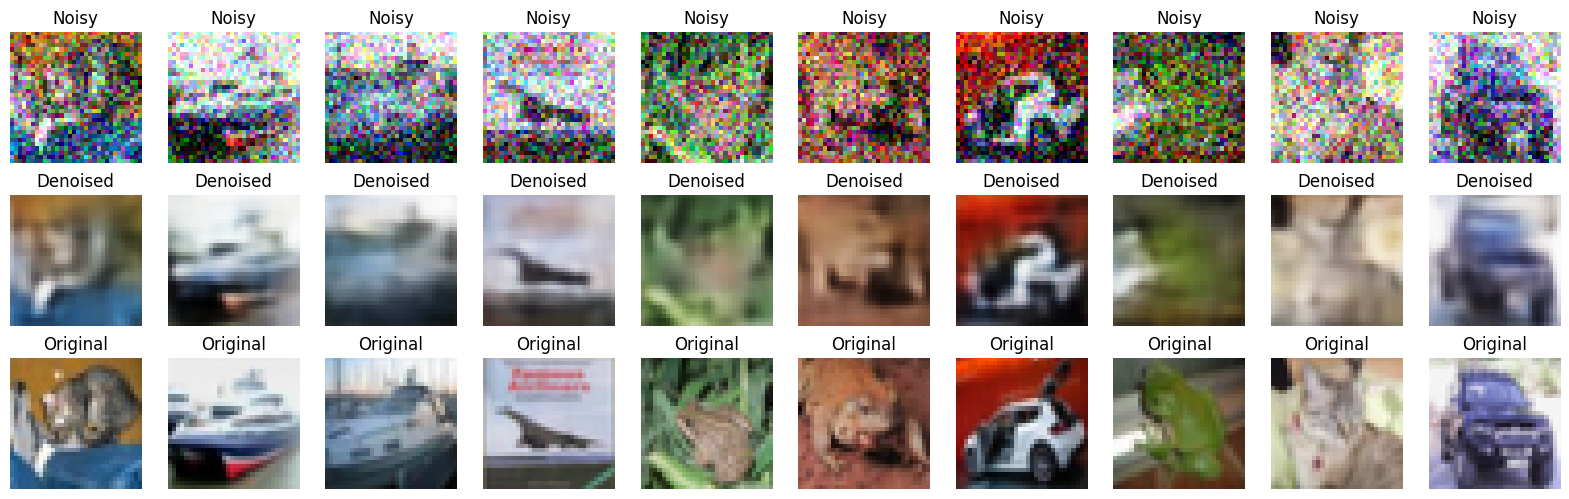

In [11]:
decoded_imgs = autoencoder.predict(x_test_noisy)

def plot_denoising(noisy, decoded, original, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Noisy input
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy[i])
        plt.title("Noisy")
        plt.axis('off')

        # Denoised output
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(decoded[i])
        plt.title("Denoised")
        plt.axis('off')

        # Original image
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis('off')
    plt.show()

plot_denoising(x_test_noisy, decoded_imgs, x_test)
